Toca refinarlo y revisarlo, pero en esencia está terminado

In [1]:
!pip install tensorflow -q

In [ ]:
# Import the necessary modules
import numpy as np
import tensorflow as tf
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# **Laboratorio**

## **1. Para el dataset make a moon de sklearn, construir un modelo de una red neuronal con keras para clasificar los datos**

Epoch 1/1000
11/11 [==============================] - 1s 30ms/step - loss: 0.6855 - accuracy: 0.4881 - val_loss: 0.6411 - val_accuracy: 0.5476
Epoch 2/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.6201 - accuracy: 0.5923 - val_loss: 0.5824 - val_accuracy: 0.7976
Epoch 3/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.5681 - accuracy: 0.8452 - val_loss: 0.5366 - val_accuracy: 0.8690
Epoch 4/1000
11/11 [==============================] - 0s 7ms/step - loss: 0.5257 - accuracy: 0.8571 - val_loss: 0.4999 - val_accuracy: 0.8690
Epoch 5/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.4910 - accuracy: 0.8601 - val_loss: 0.4702 - val_accuracy: 0.8452
Epoch 6/1000
11/11 [==============================] - 0s 8ms/step - loss: 0.4626 - accuracy: 0.8661 - val_loss: 0.4447 - val_accuracy: 0.8452
Epoch 7/1000
11/11 [==============================] - 0s 9ms/step - loss: 0.4374 - accuracy: 0.8661 - val_loss: 0.4231 - val_accuracy: 0.8452
Epoch

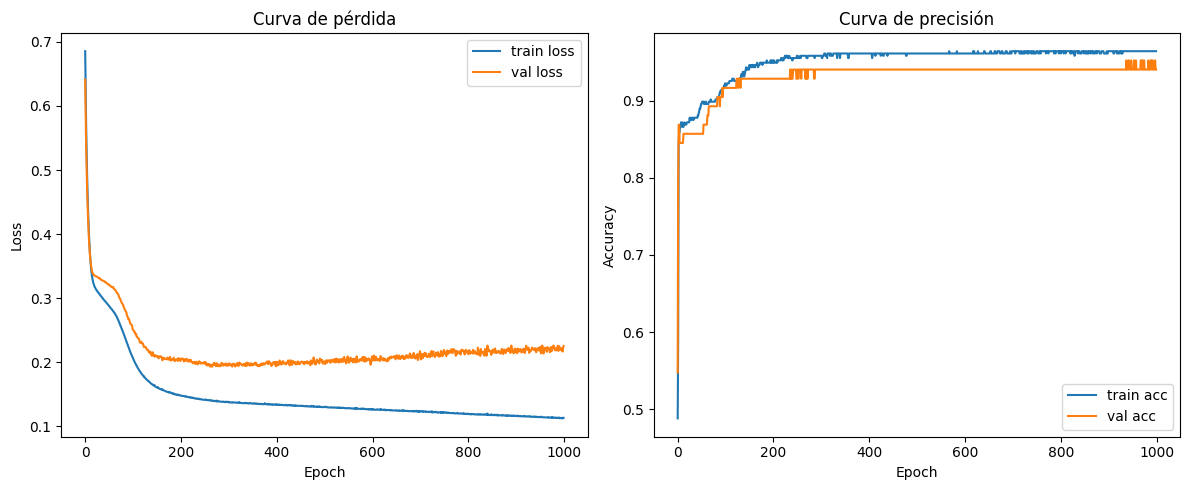

Test loss: 0.2319, Test accuracy: 0.9500


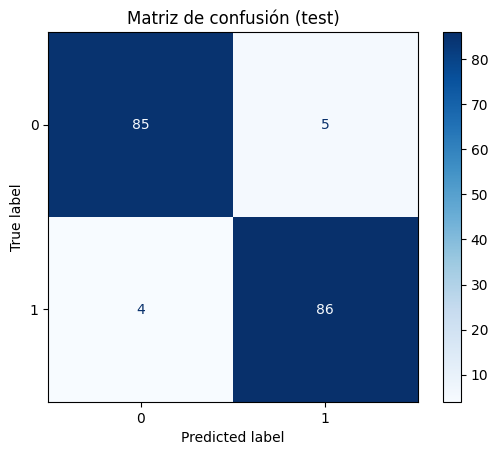

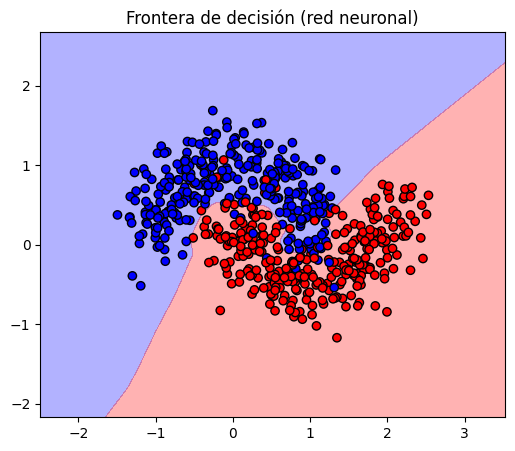

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras import layers

# 1) Reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)

# 2) Datos make_moons
X, y = make_moons(n_samples=600, noise=0.25, random_state=42)

# 3) Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 4) Escalado
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s  = scaler.transform(X_test)

# 5) Modelo mejorado
model = keras.Sequential([
    layers.Input(shape=(2,)),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=20, restore_best_weights=True
)

# 6) Entrenamiento con registro del historial
history = model.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=1000,
    batch_size=32,
    # callbacks=[early_stop],
    verbose=1
)

# 7) Gráficas de pérdida y precisión
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Curva de pérdida")

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title("Curva de precisión")
plt.tight_layout()
plt.show()

# 8) Evaluación en test
test_loss, test_acc = model.evaluate(X_test_s, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# 9) Matriz de confusión visual
y_prob = model.predict(X_test_s, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)
cm = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(ax=ax, cmap=plt.cm.Blues)
ax.set_title("Matriz de confusión (test)")
plt.show()

# 10) Frontera de decisión
h = 0.02
x_min, x_max = X[:,0].min() - 1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() - 1, X[:,1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
grid = np.c_[xx.ravel(), yy.ravel()]
grid_s = scaler.transform(grid)
Z = model.predict(grid_s, verbose=0).ravel()
Z = Z.reshape(xx.shape)

plt.figure(figsize=(6,5))
plt.contourf(xx, yy, Z, alpha=0.3, levels=[0, 0.5, 1], colors=["blue","red"])
plt.scatter(X[:,0], X[:,1], c=y, edgecolors="k", cmap=plt.cm.bwr)
plt.title("Frontera de decisión (red neuronal)")
plt.show()


## **2. Para el dataset load digits, construir un modelo de red neuronal empleando keras para realizar la clasificación**

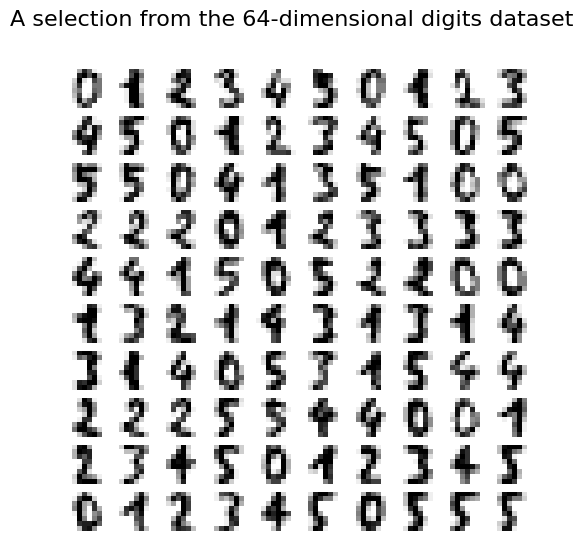

In [15]:
digits = load_digits(n_class=6)
X, y = digits.data, digits.target
n_samples, n_features = X.shape

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
_ = fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

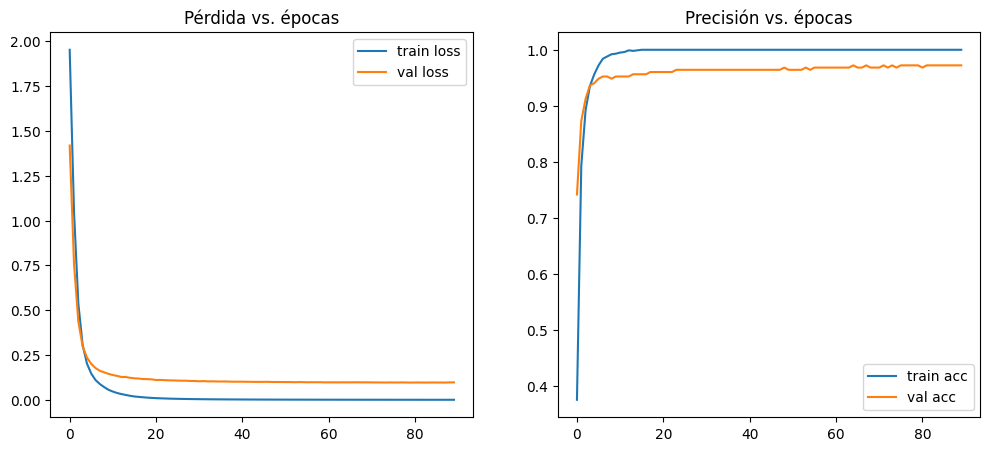

Test loss: 0.1692, Test accuracy: 0.9759


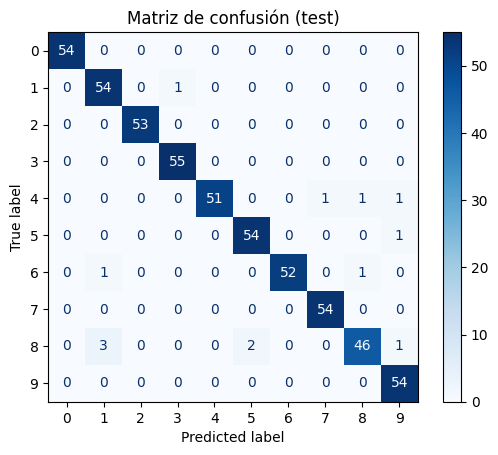

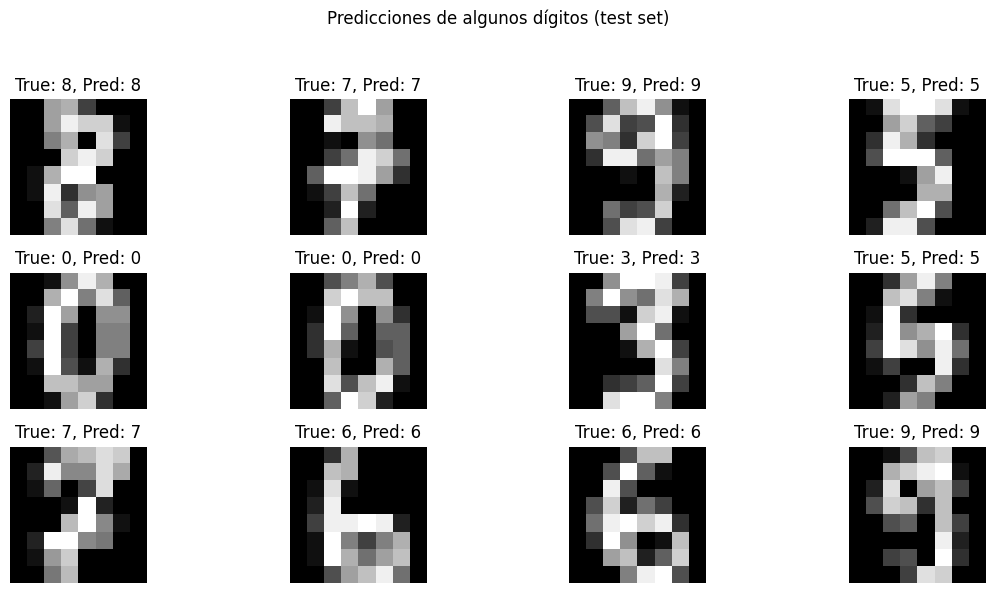

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import tensorflow as tf
from tensorflow import keras
from keras import layers

# A) Reproducibilidad
np.random.seed(42)
tf.random.set_seed(42)


# Cargar datos
digits = load_digits()
X = digits.data
y = digits.target
images = digits.images  # imágenes para visualizar

# Split train/test
X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.3, random_state=42, stratify=y
)

# D) Escalado
scaler = StandardScaler().fit(X_train)
X_train_s = scaler.transform(X_train)
X_test_s = scaler.transform(X_test)

# E) Modelo en Keras
n_classes = 10
model = keras.Sequential([
    layers.Input(shape=(64,)),
    layers.Dense(64, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(n_classes, activation="softmax")
])

model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

early_stop = keras.callbacks.EarlyStopping(
    monitor="val_loss", patience=10, restore_best_weights=True
)

# F) Entrenamiento
history = model.fit(
    X_train_s, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=0
)

# G) Visualizar evolución
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.title("Pérdida vs. épocas")
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"], label="train acc")
plt.plot(history.history["val_accuracy"], label="val acc")
plt.title("Precisión vs. épocas")
plt.legend()
plt.show()

# H) Evaluación
test_loss, test_acc = model.evaluate(X_test_s, y_test, verbose=0)
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")

# I) Predicciones y matriz de confusión
y_pred = model.predict(X_test_s, verbose=0).argmax(axis=1)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matriz de confusión (test)")
plt.show()

#  Visualizar predicciones
n = 12  # cantidad de imágenes a mostrar
indices = np.random.choice(len(X_test), n, replace=False)

plt.figure(figsize=(12, 6))
for i, idx in enumerate(indices):
    ax = plt.subplot(3, 4, i + 1)
    ax.imshow(img_test[idx], cmap="gray")
    ax.set_title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}")
    ax.axis("off")
plt.suptitle("Predicciones de algunos dígitos (test set)")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()